<a href="https://colab.research.google.com/github/kellerdevin/Retail-Store/blob/main/Copy_of_Project_4_1_var_89_R2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import statsmodels.api as sm


# Load your dataset (replace 'your_data.csv' with the actual filename)
url = "https://raw.githubusercontent.com/kellerdevin/Retail-Store/main/Retail_Data_Final.csv"
data = pd.read_csv(url)




In [2]:
data

,DMA,Income before taxes,Age of reference person,People,Children under 18,Adults 65 and older,Earners,Vehicles,Percent homeowner,Average annual expenditures,...,HHld Exp - Taxi,HHld Exp - Other Public Transportation,White,African American,American Indian,Asian,Hawaiian/Pacific Islander,Other Race,Multi-Race,Hispanic
0,Anchorage,96094,49.1,2.6,0.6,0.3,1.5,2.5,60,71606,...,36.41,109.79,305538,19141,23463,30751,4389,1070,42575,34155
1,Atlanta,90502,47.7,2.7,0.8,0.3,1.4,1.8,61,62250,...,31.32,94.57,3637619,2135064,13996,376766,2584,23444,119742,741050
2,Baltimore,91988,52.1,2.5,0.6,0.4,1.4,1.9,70,69126,...,37.64,114.21,1757353,832437,7196,167623,1278,3179,68393,166900
3,Boston,95276,49.6,2.2,0.5,0.4,1.3,1.6,55,74316,...,41.05,124.68,4958971,470299,8963,464940,1351,37039,105921,639989
4,Chicago,76639,49.9,2.5,0.6,0.4,1.3,1.6,63,60582,...,35.34,107.30,5172037,1607623,14084,640235,2073,13959,152385,2103544
5,Dallas-Ft.Worth,78842,46.9,2.5,0.6,0.2,1.4,1.6,53,63207,...,33.22,100.11,3993609,1203746,33169,502550,6372,15190,136839,2210533
6,Denver,105790,46.7,2.5,0.6,0.3,1.5,2.0,62,74088,...,35.95,108.52,3108802,188034,21410,161234,3649,12394,91422,960115
7,Detroit,80928,52.9,2.4,0.5,0.4,1.3,1.9,66,60183,...,30.86,93.80,3294702,1011116,13578,224770,928,4931,105921,221980
8,Honolulu,93672,53.0,2.7,0.6,0.5,1.4,1.7,54,65099,...,35.87,108.84,315779,29473,2598,524334,101863,1658,310985,144667
9,Houston,80250,46.8,2.8,0.8,0.3,1.4,1.7,59,67304,...,33.86,102.06,2804395,1233812,18094,543532,3474,18175,100138,2618888


In [3]:
# use isna() to create a DataFrame with boolean values indicating NA values
na_df = data.isna()

# use sum() to count the number of NA values in each column
na_counts = na_df.sum()

# use any() to check which columns have at least one NA value
cols_with_na = na_df.any()

# print the names of columns that have at least one NA value
print(cols_with_na[cols_with_na == True].index.tolist())

['Average Weekly']


In [4]:
data.describe()

,Income before taxes,Age of reference person,People,Children under 18,Adults 65 and older,Earners,Vehicles,Percent homeowner,Average annual expenditures,Food,...,HHld Exp - Taxi,HHld Exp - Other Public Transportation,White,African American,American Indian,Asian,Hawaiian/Pacific Islander,Other Race,Multi-Race,Hispanic
count,22.000000,22.000000,22.00000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,...,22.000000,22.000000,2.200000e+01,2.200000e+01,22.000000,2.200000e+01,22.000000,22.000000,22.000000,2.200000e+01
mean,90344.772727,50.168182,2.50000,0.581818,0.359091,1.386364,1.809091,60.136364,67913.227273,8278.272727,...,35.615000,107.905455,3.459963e+06,9.288172e+05,24460.045455,6.148844e+05,12716.636364,18419.227273,154825.636364,1.528713e+06
std,15340.125572,2.374144,0.16619,0.105272,0.073414,0.108213,0.299061,6.379248,8294.618634,1221.713402,...,5.781039,17.461438,2.113097e+06,8.503974e+05,26853.070637,7.214999e+05,23345.865111,22662.683076,98792.689561,1.906262e+06
min,60340.000000,46.700000,2.20000,0.400000,0.200000,1.100000,1.200000,49.000000,48654.000000,6289.000000,...,26.390000,80.710000,3.055380e+05,1.914100e+04,2598.000000,3.075100e+04,928.000000,1070.000000,42575.000000,3.415500e+04
25%,79194.000000,48.950000,2.40000,0.500000,0.300000,1.300000,1.625000,55.250000,62286.000000,7324.250000,...,31.795000,95.955000,2.518200e+06,2.915775e+05,12017.250000,1.758558e+05,1730.250000,5476.250000,93601.000000,3.330205e+05
50%,89738.000000,49.700000,2.50000,0.600000,0.400000,1.400000,1.750000,59.500000,67137.500000,8285.000000,...,35.480000,107.390000,3.262456e+06,6.895255e+05,14775.000000,4.328395e+05,3561.500000,11803.500000,117298.000000,9.279800e+05
75%,95889.500000,52.175000,2.57500,0.600000,0.400000,1.475000,1.900000,63.000000,73467.500000,8952.500000,...,37.282500,112.702500,3.941505e+06,1.277620e+06,29866.500000,5.752345e+05,8494.500000,22126.750000,183667.250000,2.019335e+06
max,124002.000000,54.400000,2.80000,0.800000,0.500000,1.600000,2.500000,75.000000,83790.000000,10958.000000,...,51.790000,156.710000,1.028685e+07,3.636919e+06,130407.000000,2.506614e+06,101863.000000,104864.000000,408907.000000,8.359098e+06


In [5]:
# Independent variables (features)
X = data[['Income before taxes', 'Entertainment', 'Vehicles', 'HHlds 1-2 Vehicles', 'African American']]

# Dependent variable (target)
y = data['Average Weekly']


In [6]:
complete_data = pd.concat([X, y], axis=1).dropna()
X = complete_data[['Entertainment']]
y = complete_data['Average Weekly']

In [7]:
complete_data.describe()

,Income before taxes,Entertainment,Vehicles,HHlds 1-2 Vehicles,African American,Average Weekly
count,9.000000,9.000000,9.000000,9.000000e+00,9.000000e+00,9.000000
mean,87231.222222,3434.111111,1.766667,9.315964e+05,8.955632e+05,16584.773333
std,17734.584593,817.962475,0.223607,4.427121e+05,5.961120e+05,4016.841750
min,60340.000000,2100.000000,1.500000,3.623610e+05,1.734240e+05,10760.140000
25%,76639.000000,2821.000000,1.600000,6.399820e+05,2.650680e+05,13247.420000
50%,80250.000000,3333.000000,1.700000,8.650530e+05,1.203746e+06,16387.310000
75%,99931.000000,4295.000000,1.900000,1.078603e+06,1.292222e+06,20070.580000
max,117844.000000,4513.000000,2.200000,1.845727e+06,1.607623e+06,22827.140000


In [8]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [11]:
# Make predictions using the testing set
y_pred = model.predict(X_test)

In [12]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean squared error: ", mse)
print("R2 score: ", r2)

Mean squared error:  267111.5677637786
R2 score:  0.8916263201061034


In [13]:
# Print table of coefficients
coefficients = pd.DataFrame({'Variable': X.columns, 'Coefficient': model.coef_})
print(coefficients)

        Variable  Coefficient
0  Entertainment     -3.67465


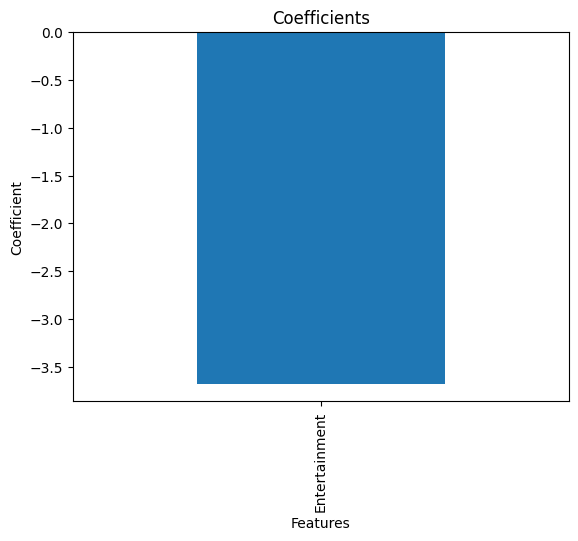

In [14]:
# Create a bar plot of feature importances (coefficients)
coef = pd.Series(model.coef_, index=X.columns)
coef.plot(kind='bar', title='Coefficients')
plt.xlabel('Features')
plt.ylabel('Coefficient')
plt.show()